# Part 1: Removal of noise from images

In [ ]:
using Pkg
Pkg.add("Images");
Pkg.add("ToeplitzMatrices");
Pkg.add("BenchmarkTools");

In [9]:
using MAT, Images, LinearAlgebra, ToeplitzMatrices

In [65]:
img_path = raw"./Challenges/";
f = matopen(joinpath(img_path, "challenge2.mat"));
B = read(f, "B");
P = read(f, "P");
Ar = read(f, "Ar"); # noise of the columns
Ac = read(f, "Ac"); # noise of the rows - independent of that of the columns


#### Process: 

To apply this transformation for noise reduction process, any image is considered as a matrix A and decomposed into three matrices U S, and V . The matrix S consists of singular value on diagonal line by ordering from maximum value, on left-top corner, to minimum values, on right-bottom corner of the matrix. Energy of signal is compressed on large singular values. The idea of this scheme is to preserve only singular values of signal and eliminate the rest of its, which can be assumed as noise. 

-> Each singular value is thresholded by hard-thresholding to eliminate singular value that is less than threshold value and remain singular value that is higher than it.

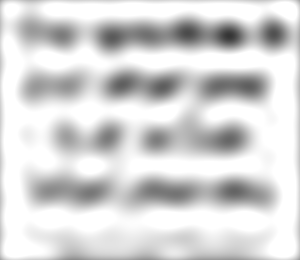

In [19]:
Fc = svd(Matrix(Ac))
Fr = svd(Matrix(Ar))
n_svd = sum(abs.(Fc.S) .≥ 0.1) # Hard-threshold
X_debruit = Fc.V[1:end, 1:n_svd] * Diagonal(1 ./ Fc.S[1:n_svd]) * Fc.U[1:end, 1:n_svd]' * 
    B * Fr.U[1:end, 1:n_svd] * Diagonal(1 ./ Fr.S[1:n_svd]) * Fr.V[1:end, 1:n_svd]'
    
Gray.(X_debruit)

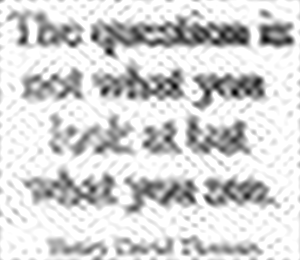

In [42]:
Fc = svd(Matrix(Ac))
Fr = svd(Matrix(Ar))
n_svd = sum(abs.(Fc.S) .≥ 0.02) # # Hard-threshold
X_debruit = Fc.V[1:end, 1:n_svd] * Diagonal(1 ./ Fc.S[1:n_svd]) * Fc.U[1:end, 1:n_svd]' * 
    B * Fr.U[1:end, 1:n_svd] * Diagonal(1 ./ Fr.S[1:n_svd]) * Fr.V[1:end, 1:n_svd]'
    
Gray.(X_debruit)

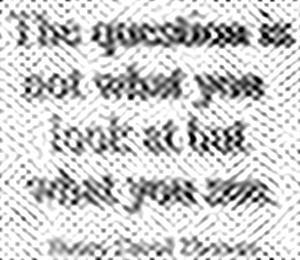

In [131]:

Fc = svd(Matrix(Ac))
Fr = svd(Matrix(Ar))
nc_svd = sum(abs.(Fc.S) .≥ 0.009)
nr_svd = sum(abs.(Fr.S) .≥ 0.015)

X_debruit = Fc.V[1:end, 1:nc_svd] * Diagonal(1 ./ Fc.S[1:nc_svd]) * Fc.U[1:end, 1:nc_svd]' * 
    B * Fr.U[1:end, 1:nr_svd] * Diagonal(1 ./ Fr.S[1:nr_svd]) * Fr.V[1:end, 1:nr_svd]'
    
Gray.(X_debruit)

Anwser: The question is not what you look at but what you see

# Part 2: 


Let's consider $argmin_x \frac{1}{2} \lVert x \rVert_2^2$ under constraint $Ax=b$ with $ A \in \mathbb{R}^{mxn}$, with $m \le n$

In other word, we want to atchived $Ax = b$ with the smallest x

By using Lagrange:

$\mathcal{L}(x, \lambda) = \frac{1}{2} \lVert x \rVert_2^2 + \lambda^T \left( Ax-b \right)$

1. $\nabla_x \mathcal{L} = 2x + A^T \lambda = 0$

2. $\nabla_{\lambda} \mathcal{L} = Ax - b = 0$

We can find with 1. and 2.: $A\left(\frac{-1}{2} A^T \lambda \right) = b \Longrightarrow \frac{-1}{2} \left( AA^T\lambda \right) = b \Longrightarrow \lambda = -2 A^T \left(AA^T \right)^{-1} b$

And by using this result: $ x = A^T(AA^T)^{-1}B$

<br>

In our case, we will solve the problem with a saddle point system.

$$ \left[ {\begin{array}{cc}  I & A^T \\ A & 0 \end{array} } \right]  \left[ {\begin{array}{cc}  2x \\ \lambda \end{array} } \right] = \left[ {\begin{array}{cc}  0 \\ \frac{b}{2} \end{array} } \right] $$  

Verification:
$ 2Ix + A^T\lambda = 0$ and $2Ax = \frac{b}{2} \Longrightarrow Ax = b$. Ok


In [4]:
using LinearAlgebra

In [2]:
# system dimension
m, n = 200, 180;

# Generate matrix
A = rand(m, n);
b = rand(m);

In [17]:
function solve_saddle_point(A, b)
    m, n = size(A);
    K = [I A'; A zeros(m,m)];
    b_sp = [zeros(n); b];
    F = bunchkaufman(K);
    sol = F \ b_sp;         # Starting with / to see if I didn't make a mistake

    return sol[1:n], sol[n+1: end]
end

two_x, λ = solve_saddle_point(A, b)

println(norm(two_x - A' * λ))
println(norm(b - A * two_x / 2))

72.83872684002765
16.95239976692176


Now let try to resolve  $ x = A^T(AA^T)^{-1}B$ with the `lq` faqctorisation directly

In [19]:
x = A' * inv(A*A') * b
println(norm(b - A * x)) # Why is it not 0 ?

189.9870031380633
